# House Prices7

In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import plotly.express as px
import plotly.graph_objects as go
import warnings
from scipy.stats import skew,boxcox
warnings.filterwarnings('ignore')

#import findspark
#findspark.init()
#import pyspark

from sklearn.metrics import classification_report, confusion_matrix

pd.options.display.max_columns = 35
pd.options.display.max_rows = 100

In [2]:
df = pd.read_csv("F:/Medium/House Prices/train.csv")
df_test = pd.read_csv("F:/Medium/House Prices/test.csv")
original_df = df.copy()

Preprocessing

In [3]:
def nlarges_nulls(df,n=20):
    total_lines = len(df)
    nulls = pd.DataFrame(
        df.T.apply(lambda x: round(np.count_nonzero(x.isnull())*100/total_lines,2),axis=1),
        columns=['Percent of nulls']
        )
    return nulls.sort_values(by='Percent of nulls',ascending=False).head(n)
    
nlarges_nulls(df)

Percent of nulls
PoolQC                   99.52
MiscFeature              96.30
Alley                    93.77
Fence                    80.75
FireplaceQu              47.26
LotFrontage              17.74
GarageYrBlt               5.55
GarageCond                5.55
GarageType                5.55
GarageFinish              5.55
GarageQual                5.55
BsmtFinType2              2.60
BsmtExposure              2.60
BsmtQual                  2.53
BsmtCond                  2.53
BsmtFinType1              2.53
MasVnrArea                0.55
MasVnrType                0.55
Electrical                0.07
Id                        0.00

In [4]:
garage_check = df[df['GarageCond'].isnull()]
garage_check[['GarageYrBlt','GarageCond','GarageType','GarageFinish','GarageFinish','GarageCars']].head(100)

GarageYrBlt GarageCond GarageType GarageFinish GarageFinish  GarageCars
39            NaN        NaN        NaN          NaN          NaN           0
48            NaN        NaN        NaN          NaN          NaN           0
78            NaN        NaN        NaN          NaN          NaN           0
88            NaN        NaN        NaN          NaN          NaN           0
89            NaN        NaN        NaN          NaN          NaN           0
99            NaN        NaN        NaN          NaN          NaN           0
108           NaN        NaN        NaN          NaN          NaN           0
125           NaN        NaN        NaN          NaN          NaN           0
127           NaN        NaN        NaN          NaN          NaN           0
140           NaN        NaN        NaN          NaN          NaN           0
148           NaN        NaN        NaN          NaN          NaN           0
155           NaN        NaN        NaN          NaN          NaN           0
163           NaN        NaN        NaN          NaN          NaN           0
165           NaN        NaN        NaN          NaN          NaN           0
198           NaN        NaN        NaN          NaN          NaN           0
210           NaN        NaN        NaN          NaN          NaN           0
241           NaN        NaN        NaN          NaN          NaN           0
250           NaN        NaN        NaN          NaN          NaN           0
287           NaN        NaN        NaN          NaN          NaN           0
291           NaN        NaN        NaN          NaN          NaN           0
307           NaN        NaN        NaN          NaN          NaN           0
375           NaN        NaN        NaN          NaN          NaN           0
386           NaN        NaN        NaN          NaN          NaN           0
393           NaN        NaN        NaN          NaN          NaN           0
431           NaN        NaN        NaN          NaN          NaN           0
434           NaN        NaN        NaN          NaN          NaN           0
441           NaN        NaN        NaN          NaN          NaN           0
464           NaN        NaN        NaN          NaN          NaN           0
495           NaN        NaN        NaN          NaN          NaN           0
520           NaN        NaN        NaN          NaN          NaN           0
528           NaN        NaN        NaN          NaN          NaN           0
533           NaN        NaN        NaN          NaN          NaN           0
535           NaN        NaN        NaN          NaN          NaN           0
562           NaN        NaN        NaN          NaN          NaN           0
582           NaN        NaN        NaN          NaN          NaN           0
613           NaN        NaN        NaN          NaN          NaN           0
614           NaN        NaN        NaN          NaN          NaN           0
620           NaN        NaN        NaN          NaN          NaN           0
635           NaN        NaN        NaN          NaN          NaN           0
636           NaN        NaN        NaN          NaN          NaN           0
638           NaN        NaN        NaN          NaN          NaN           0
649           NaN        NaN        NaN          NaN          NaN           0
705           NaN        NaN        NaN          NaN          NaN           0
710           NaN        NaN        NaN          NaN          NaN           0
738           NaN        NaN        NaN          NaN          NaN           0
750           NaN        NaN        NaN          NaN          NaN           0
784           NaN        NaN        NaN          NaN          NaN           0
826           NaN        NaN        NaN          NaN          NaN           0
843           NaN        NaN        NaN          NaN          NaN           0
921           NaN        NaN        NaN          NaN          NaN           0
942           NaN        NaN

In [5]:
total_lines = len(df)
print("Percent of the corresponding nulls = {:.2f}%".format(len(garage_check)/total_lines*100))

Percent of the corresponding nulls = 5.55%


This proves that the missing data in the GarageX field corresponds to the same set of data referring to the absence of the garage. So we could safely impute a string value for instance 'None' in this case. Let's proceed with the basement fields.

In [6]:
basement_check = df[df['BsmtCond'].isnull()]
basement_check[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']].head(100)

BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2
17        NaN      NaN          NaN          NaN          NaN
39        NaN      NaN          NaN          NaN          NaN
90        NaN      NaN          NaN          NaN          NaN
102       NaN      NaN          NaN          NaN          NaN
156       NaN      NaN          NaN          NaN          NaN
182       NaN      NaN          NaN          NaN          NaN
259       NaN      NaN          NaN          NaN          NaN
342       NaN      NaN          NaN          NaN          NaN
362       NaN      NaN          NaN          NaN          NaN
371       NaN      NaN          NaN          NaN          NaN
392       NaN      NaN          NaN          NaN          NaN
520       NaN      NaN          NaN          NaN          NaN
532       NaN      NaN          NaN          NaN          NaN
533       NaN      NaN          NaN          NaN          NaN
553       NaN      NaN          NaN          NaN          NaN
646       NaN      NaN          NaN          NaN          NaN
705       NaN      NaN          NaN          NaN          NaN
736       NaN      NaN          NaN          NaN          NaN
749       NaN      NaN          NaN          NaN          NaN
778       NaN      NaN          NaN          NaN          NaN
868       NaN      NaN          NaN          NaN          NaN
894       NaN      NaN          NaN          NaN          NaN
897       NaN      NaN          NaN          NaN          NaN
984       NaN      NaN          NaN          NaN          NaN
1000      NaN      NaN          NaN          NaN          NaN
1011      NaN      NaN          NaN          NaN          NaN
1035      NaN      NaN          NaN          NaN          NaN
1045      NaN      NaN          NaN          NaN          NaN
1048      NaN      NaN          NaN          NaN          NaN
1049      NaN      NaN          NaN          NaN          NaN
1090      NaN      NaN          NaN          NaN          NaN
1179      NaN      NaN          NaN          NaN          NaN
1216      NaN      NaN          NaN          NaN          NaN
1218      NaN      NaN          NaN          NaN          NaN
1232      NaN      NaN          NaN          NaN          NaN
1321      NaN      NaN          NaN          NaN          NaN
1412      NaN      NaN          NaN          NaN          NaN

Absolutely the same applies to the basement-absent fields.

All in all, we believe that substituting the absent values in these case is reasonambe at this point. On the modelling/training phase we maight reconsinder this depending on the performance or furhter discovered insights.

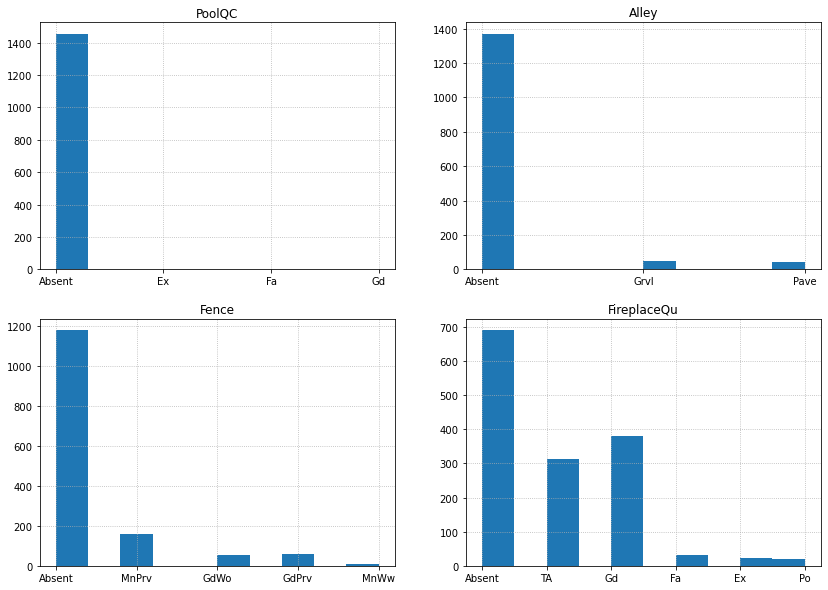

In [7]:
featureset = ['PoolQC','Alley','Fence','FireplaceQu']
f,ax = plt.subplots(2,2,figsize=(14,10))

for row in range(2):
    for col in range(2):
        ax[row,col].hist(df[featureset[row*2+col]].replace(np.nan,'Absent'))
        ax[row,col].title.set_text(featureset[row*2+col])
        ax[row,col].grid(True,linestyle=':')
plt.show()

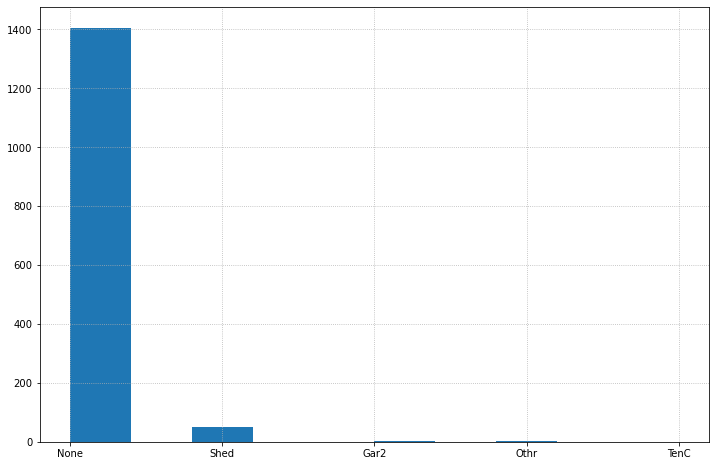

In [8]:
f,ax = plt.subplots(figsize=(12,8))
plt.hist(df['MiscFeature'].replace(np.nan,'None'))
plt.grid(True,linestyle=':')

We can see that even though the number of missing values in each of the columns above is overwhelming, there some portion of samples is distributed among all the other classes, so deleting those features complitely may well lead to lost of a valuable parameter. Thus, we will be applying imputing in these cases as well, leaving the possibility of reconsidering that decision on the following iteration of the analisys.

<AxesSubplot:>

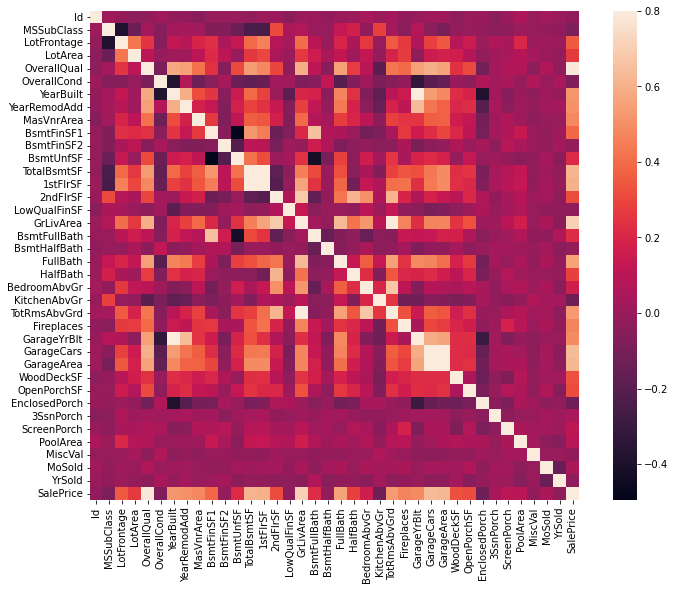

In [9]:
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(df.corr(), vmax=.8, square=True)

Some of the other insights we can infer from the heatmap:

GarageArea and GarageCars have strong correlation with SalePrice, so we might want to only consider one later.
FirePlaces indicates a strong correlation with the target value as well so delting FirePlaceQU we will not loose much if anything at all.
BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath missing values are likely due to having no basement so we can impute zero value.
BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 For all these categorical basement-related features, NaN most likely means that there is no basement.

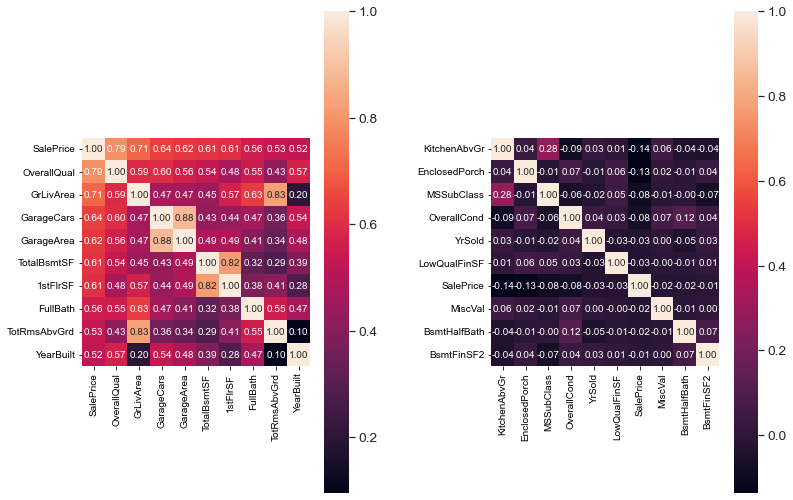

In [10]:
cols_max = list(df.corr().nlargest(10, 'SalePrice')['SalePrice'].index)
cols_min = list(df.corr().nsmallest(10, 'SalePrice')['SalePrice'].index)
cumcols = [cols_max,cols_min]

if 'Id' in cols_min or 'SalePrice' not in cols_min:
    for i in range(len(cols_min)):
        if cols_min[i] == 'Id':
            cols_min[i]='SalePrice'
            continue

f,ax = plt.subplots(1,2,figsize=(12,8))
for i in range(2): 
    cm = np.corrcoef(df[cumcols[i]].values.T)
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, 
                     fmt='.2f', annot_kws={'size': 10}, yticklabels=cumcols[i], xticklabels=cumcols[i],
                    ax=ax[i])
f.tight_layout(pad=3)
plt.show()

In [11]:
df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [12]:
from collections import Counter
print('Most common Electrical values for the neighbourhood in descending (by frequency) order: ')
TRAIN_ELECTRICITY_FREQ = df.groupby('Neighborhood')['Electrical'].apply(lambda x: Counter(x).keys())
TRAIN_ELECTRICITY_FREQ

Most common Electrical values for the neighbourhood in descending (by frequency) order: 


Neighborhood
Blmngtn                         (SBrkr)
Blueste                         (SBrkr)
BrDale                          (SBrkr)
BrkSide           (SBrkr, FuseA, FuseF)
ClearCr           (SBrkr, FuseA, FuseF)
CollgCr                         (SBrkr)
Crawfor           (SBrkr, FuseA, FuseF)
Edwards    (FuseP, FuseF, SBrkr, FuseA)
Gilbert                         (SBrkr)
IDOTRR       (FuseF, SBrkr, FuseA, Mix)
MeadowV                         (SBrkr)
Mitchel                  (SBrkr, FuseA)
NAmes             (SBrkr, FuseA, FuseF)
NPkVill                         (SBrkr)
NWAmes                          (SBrkr)
NoRidge                         (SBrkr)
NridgHt                         (SBrkr)
OldTown    (FuseF, SBrkr, FuseA, FuseP)
SWISU             (SBrkr, FuseA, FuseF)
Sawyer                          (SBrkr)
SawyerW                  (SBrkr, FuseA)
Somerst                         (SBrkr)
StoneBr                         (SBrkr)
Timber              (SBrkr, FuseA, nan)
Veenker                    

In [13]:
TRAIN_LOTFRNT_MEDIAN = df.groupby('Neighborhood')['LotFrontage'].apply(lambda x: x.median())
TRAIN_LOTFRNT_MEDIAN

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    52.0
ClearCr    80.0
CollgCr    70.0
Crawfor    74.0
Edwards    65.5
Gilbert    65.0
IDOTRR     60.0
MeadowV    21.0
Mitchel    73.0
NAmes      73.0
NPkVill    24.0
NWAmes     80.0
NoRidge    91.0
NridgHt    88.5
OldTown    60.0
SWISU      60.0
Sawyer     71.0
SawyerW    66.5
Somerst    73.5
StoneBr    61.5
Timber     85.0
Veenker    68.0
Name: LotFrontage, dtype: float64

Imputing the data

In [14]:
def prep_fill_nulls(df):
    #Define the features which nas' will be substituted with string value
    no_features_cols = df.select_dtypes(object)
    #Define the features which nas' will be substituted with numerical value
    zero_feature_cols = df.select_dtypes(np.number)
    
    #Apply imputing
    for col in no_features_cols:
        df[col] = df[col].fillna('None')
    
    for col in zero_feature_cols:
        df[col] = df[col].fillna(0)
    
    #Apply transforamtion using the data collections based on neigborhoods
    df['Electrical'] = df.groupby('Neighborhood')['Electrical'].transform(
                lambda x: x.fillna( list(TRAIN_ELECTRICITY_FREQ[x.name])[0]))
    
    df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(
        lambda x: x.fillna( TRAIN_LOTFRNT_MEDIAN[x.name]))
    return df

In [15]:
df = prep_fill_nulls(df)
nlarges_nulls(df,n=5)

Percent of nulls
Id                        0.0
CentralAir                0.0
GarageYrBlt               0.0
GarageType                0.0
FireplaceQu               0.0

Outliers filerting

In [16]:
from sklearn.ensemble import IsolationForest

In [17]:
continuous_df = df.select_dtypes(np.number)
descrete_df = df.select_dtypes(object)

#We know that there should not be too many of the outliers thus contamination is set to be very low
detector = IsolationForest(n_estimators=150, max_samples='auto', contamination=float(0.005),max_features=1,
                          random_state=777)
detector.fit(continuous_df)

IsolationForest(contamination=0.005, max_features=1, n_estimators=150,
                random_state=777)

In [18]:
df['cont_anomaly'] = detector.predict(df[continuous_df.columns])

In [19]:
def display_continuous_outliers(fsize=(8,200)):
    nfeatures = len(continuous_df.columns)
    f,ax = plt.subplots(nfeatures,1,figsize=fsize)
    for row in range(nfeatures):
        sns.scatterplot(data=df, x=continuous_df.columns[row], y="SalePrice", hue="cont_anomaly",ax=ax[row])
    plt.tight_layout(pad=3)
    plt.show()

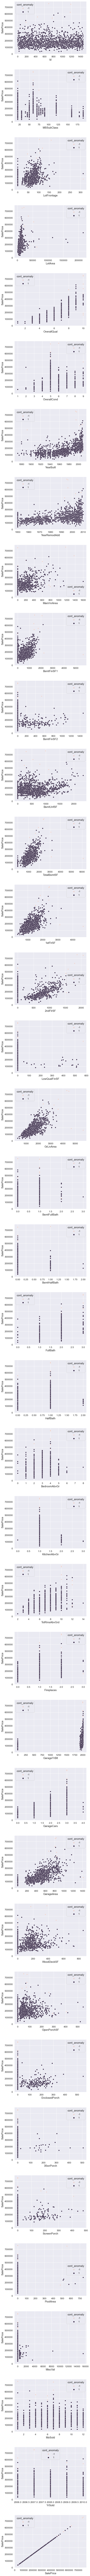

In [20]:
# -1 - means outlier
display_continuous_outliers()

In general we agree with the predictions, the points it has marked as outliers (-1) show up in the extremities of one or the other plot. We might even add to the level opf the contamination on one of the next iteration. However, while the examination we identified several points that may be delted manualy as they apparently are outliers.

LotFrontage: there is one big house (>300) for a very low price that was not marked as outlier. There are 2 in total so we could delete points with LotFrontage>300.
LotArea: there are couple of point of the right side as well, huge areas but the price is low. Such data is more likely to introduce noise into the model. We could consider deleting points with LotArea>100000
MasVnrArea: there is the point with MasVnrArea~1600 wich is by far more than the avg for the dataset and it has a pretty low saleprice. Likely to introduce disturbance to the model.
BsmtFinSF2: there are 2 points that might be considered as additional outliers. Or rather just one >1400
OpenPorchSF: the point with huge porch area > 500 and terribly low price.

MSSubCLass, OverallCond, [YearRemodAdd],[GarageYrBlt], [MoSold], [YrSold] are in fact categorical and should be transformed into strings later on.

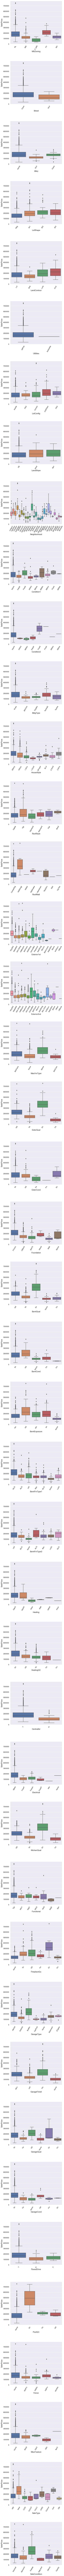

In [21]:
nfeatures = len(descrete_df.columns)
f,ax = plt.subplots(nfeatures,1,figsize=(8,280))
for row in range(nfeatures):
    sns.boxplot(data=df, x=descrete_df.columns[row], y="SalePrice",ax=ax[row])
    ax[row].set_xticklabels(ax[row].get_xticklabels(),rotation=60)
plt.tight_layout(pad=3)
plt.show()

After examining the numerical features, lets have a brief look at the distribulion in the categorical features. Some of the findings:

Based on IQR criteria there migth be too many of the outliers to delete them all, we will look at it closer on the graph. (We migth increase the threshold up to 2IQRs)
LotShape: lots with slightly irregular shapes are among the most expensive items in the dataset, which might be due to some architectural solutions and might not be such a critical point.
LandContour: same as above.
LandSlope: the most convenient type of surface is Gtl.
Even though there are a lot of point out of the 1.5*IQR range we would not consider those 100% outliers, we rather would make this range wider and consider only the most extremal cases.

In [22]:
#Lets display points that are outliers according to the IQR critera on the graph
iqr_magnitude = 2.0
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
continuous_df
before_iqr_df = df.copy()

continuous_df = continuous_df.drop(columns=['Id','MSSubClass','OverallCond','YearRemodAdd','GarageYrBlt',
                                                'MoSold','YrSold','LotFrontage','GarageCars',
                                           'Fireplaces','TotRmsAbvGrd','KitchenAbvGr','BedroomAbvGr',
                                           'HalfBath','FullBath','BsmtHalfBath','BsmtFullBath','YearBuilt',
                                           'OverallQual'])

#This function assigns the marker -2 to the 
#cont_anomaly of row if its value of a feature
#lies further away than iqr_magnitude*IQR from 
#median of the feature.
def add_iqr_outlier_marker(omit_marker=None):
    for feature,i in zip(continuous_df
                         .columns,range(2,len(continuous_df.columns)+2)):
        for index, row in df.iterrows():
            if omit_marker:
                if row["cont_anomaly"] in omit_marker:
                    continue
            if row[feature] > Q3[feature]+iqr_magnitude*IQR[feature] or \
            row[feature] < Q1[feature]-iqr_magnitude*IQR[feature]:
                df.loc[index,"cont_anomaly"] = -2
add_iqr_outlier_marker(omit_marker=[-1])

In [23]:
print("There are {} out of total {} rows which are outliers according to the IQR statistical technique.".format(
        df[df["cont_anomaly"]<0]["cont_anomaly"].count(),len(df)))

There are 627 out of total 1460 rows which are outliers according to the IQR statistical technique.


In [24]:
before_iqr_df['cont_anomaly'].unique()

array([ 1, -1])

In [25]:
iqr_magnitude = 10.0
df = before_iqr_df.copy()
add_iqr_outlier_marker(omit_marker=[-1])

In [26]:
print("There are {} out of total {} rows which are outliers according to the IQR statistical technique.".format(
        df[df["cont_anomaly"]<0]["cont_anomaly"].count(),len(df)))

There are 513 out of total 1460 rows which are outliers according to the IQR statistical technique.


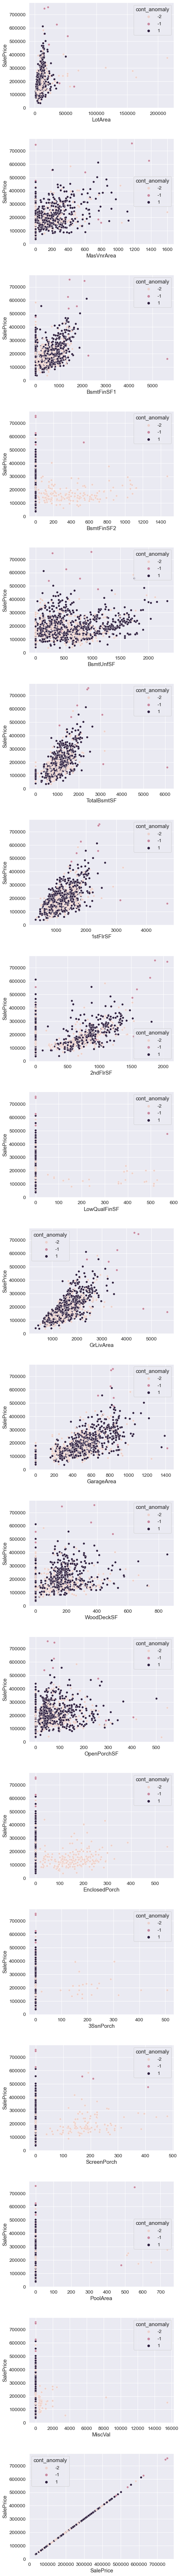

In [27]:
display_continuous_outliers(fsize=(8,100))

We can see that due to predominant absense of the feature in many of the houses the houses which have the feature become too distinct so by IQR approach they are outliers. Lets exclude those features from consideration.

In [28]:
continuous_df = continuous_df.drop(columns=['BsmtFinSF2','LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
                                           'MiscVal','SalePrice'])

iqr_magnitude = 4.5
df = before_iqr_df.copy()
add_iqr_outlier_marker(omit_marker=[-1])

In [29]:
print("There are {} out of total {} rows which are outliers according to the IQR statistical technique.".format(
        df[df["cont_anomaly"]<0]["cont_anomaly"].count(),len(df)))

There are 39 out of total 1460 rows which are outliers according to the IQR statistical technique.


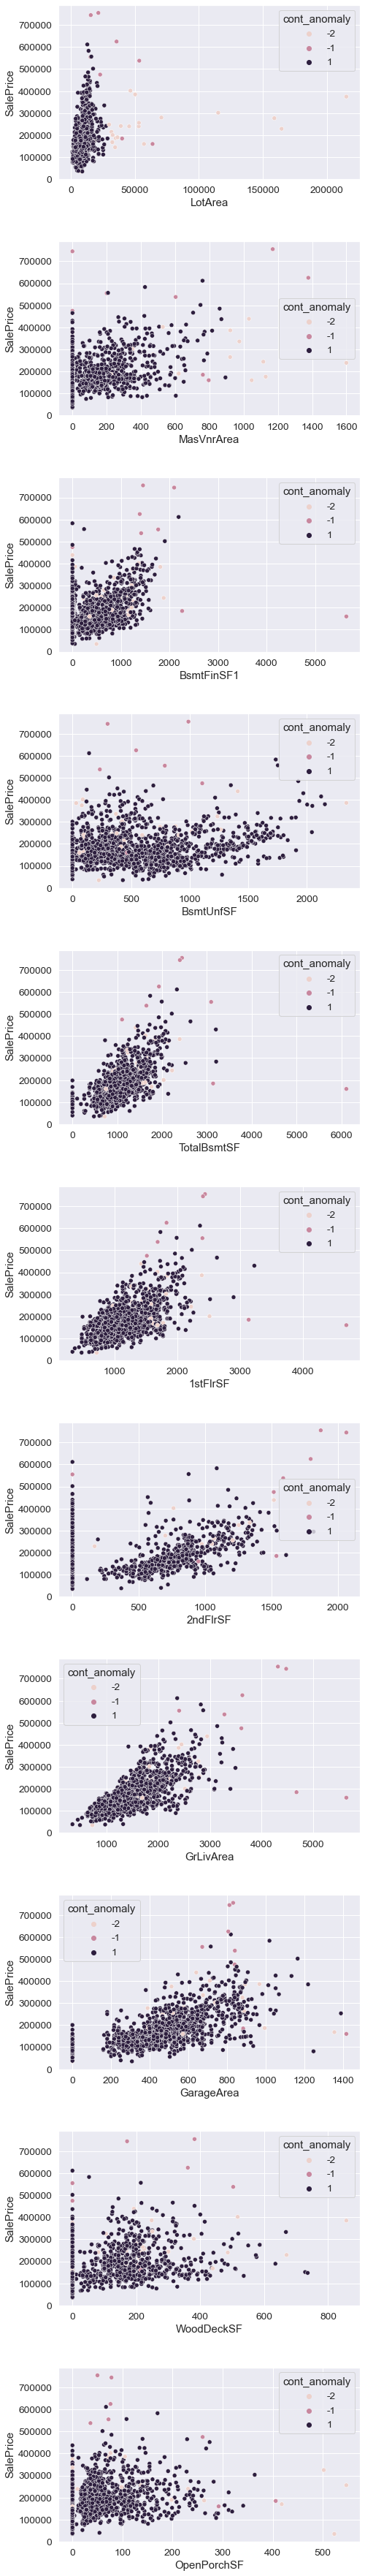

In [30]:
display_continuous_outliers(fsize=(8,50))

Now tha leaves us a much cleaner data distribution especailly for LotArea feture where most of the huge and and not so expensive buildings were marked as outliers, same goes for MasVnrArea, so I think we may delete those newly added outliers. Let's save the final dataframe.

In [31]:
df = df[~df['Id'].isin([935,1299])] #yeah this weird but df = df[df['LotFrontage']<300] deletes 200+ rows instead just the two for some reason.
df = df[df['LotArea']<100000]
df = df[df['MasVnrArea']<1400]
df = df[df['BsmtFinSF2']<1400]
df = df[~((df['OpenPorchSF']>500) & (df['SalePrice']<100000))]

df = df[df['cont_anomaly']!=(-1)]
#Optional
df = df[df['cont_anomaly']!=(-2)]

In [32]:
df.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1419.000000  1419.000000  1419.000000   1419.000000  1419.000000   
mean    733.398872    56.920366    57.061311   9589.651163     6.069767   
std     421.942309    42.180451    32.912583   3794.974146     1.350989   
min       1.000000    20.000000     0.000000   1300.000000     1.000000   
25%     368.500000    20.000000    42.000000   7500.000000     5.000000   
50%     736.000000    50.000000    63.000000   9364.000000     6.000000   
75%    1097.500000    70.000000    78.000000  11380.500000     7.000000   
max    1460.000000   190.000000   182.000000  28698.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1419.000000  1419.000000   1419.000000  1419.000000  1419.000000   
mean      5.577167  1971.287526   1984.819591    94.623679   428.486258   
std       1.109105    30.198949     20.700255   156.157679   423.396702   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1953.500000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   375.000000   
75%       6.000000  2001.000000   2004.000000   159.000000   699.500000   
max       9.000000  2010.000000   2010.000000   894.000000  2188.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1419.000000  1419.000000  1419.000000  1419.000000  1419.000000   
mean     43.828048   567.940099  1040.254405  1146.324172   339.387597   
std     152.047549   440.882406   404.166934   361.476192   425.243049   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   793.000000   876.000000     0.000000   
50%       0.000000   483.000000   981.000000  1078.000000     0.000000   
75%       0.000000   807.000000  1272.500000  1368.000000   726.000000   
max    1127.000000  2153.000000  3206.000000  3228.000000  1818.000000   

       LowQualFinSF    GrLivArea  ...  KitchenAbvGr  TotRmsAbvGrd  \
count   1419.000000  1419.000000  ...   1419.000000   1419.000000   
mean       5.610289  1491.322058  ...      1.047216      6.481325   
std       46.962740   482.604746  ...      0.221923      1.594299   
min        0.000000   334.000000  ...      0.000000      2.000000   
25%        0.000000  1125.000000  ...      1.000000      5.000000   
50%        0.000000  1452.000000  ...      1.000000      6.000000   
75%        0.000000  1754.000000  ...      1.000000      7.000000   
max      528.000000  3493.000000  ...      3.000000     14.000000   

        Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  \
count  1419.000000  1419.000000  1419.000000  1419.000000  1419.000000   
mean      0.589852  1866.976039     1.750529   467.776603    91.164200   
std       0.629154   457.138311     0.743418   210.105495   120.995392   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000  1958.000000     1.000000   319.500000     0.000000   
50%       1.000000  1977.000000     2.000000   474.000000     0.000000   
75%       1.000000  2001.000000     2.000000   576.000000   168.000000   
max       3.000000  2010.000000     4.000000  1390.000000   736.000000   

       OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea  \
count  1419.000000    1419.000000  1419.000000  1419.000000  1419.000000   
mean     44.569415      22.305144     3.508104    13.933051     2.109232   
std      60.463874      61.657803    29.732335    52.334315    35.840857   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     0.000000   
50%      24.000000       0.000000     0.000000     0.000000     0.000000   
75%      66.000000       0.000000     0.000000     0.000000     0.000000   
max     364.000000     552.000000   508.000000   440.000000   738.000000   

            MiscVal    

Feature engineering

In [33]:
def prep_cont_to_desc(df):
    cont_to_descr = ['MSSubClass','OverallCond','YearRemodAdd','GarageYrBlt',
                    'MoSold','YrSold','GarageCars',
                    'Fireplaces','TotRmsAbvGrd','KitchenAbvGr','BedroomAbvGr',
                    'HalfBath','FullBath','BsmtHalfBath','BsmtFullBath','YearBuilt',
                    'OverallQual']


    for feature in cont_to_descr:
        df[feature] = df[feature].astype(str)
    df[cont_to_descr].info()
    return df
df = prep_cont_to_desc(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1419 entries, 0 to 1459
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSSubClass    1419 non-null   object
 1   OverallCond   1419 non-null   object
 2   YearRemodAdd  1419 non-null   object
 3   GarageYrBlt   1419 non-null   object
 4   MoSold        1419 non-null   object
 5   YrSold        1419 non-null   object
 6   GarageCars    1419 non-null   object
 7   Fireplaces    1419 non-null   object
 8   TotRmsAbvGrd  1419 non-null   object
 9   KitchenAbvGr  1419 non-null   object
 10  BedroomAbvGr  1419 non-null   object
 11  HalfBath      1419 non-null   object
 12  FullBath      1419 non-null   object
 13  BsmtHalfBath  1419 non-null   object
 14  BsmtFullBath  1419 non-null   object
 15  YearBuilt     1419 non-null   object
 16  OverallQual   1419 non-null   object
dtypes: object(17)
memory usage: 199.5+ KB


In [34]:
df = df.drop(columns=['cont_anomaly'])
df.to_csv('train_clean.csv',index=False)

In [35]:
numeric_feats = list(df.select_dtypes(np.number))

skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(15)

Skew
MiscVal        24.294845
PoolArea       17.278511
3SsnPorch      10.144243
LowQualFinSF    9.059015
BsmtFinSF2      4.136487
ScreenPorch     4.082566
EnclosedPorch   3.058068
MasVnrArea      1.991703
OpenPorchSF     1.802310
SalePrice       1.460455
WoodDeckSF      1.451119
BsmtUnfSF       0.899959
1stFlrSF        0.867877
LotArea         0.818788
GrLivArea       0.778437

We can see that there quite a bit of skeweness in the data, lets see if we can make it normal-like.

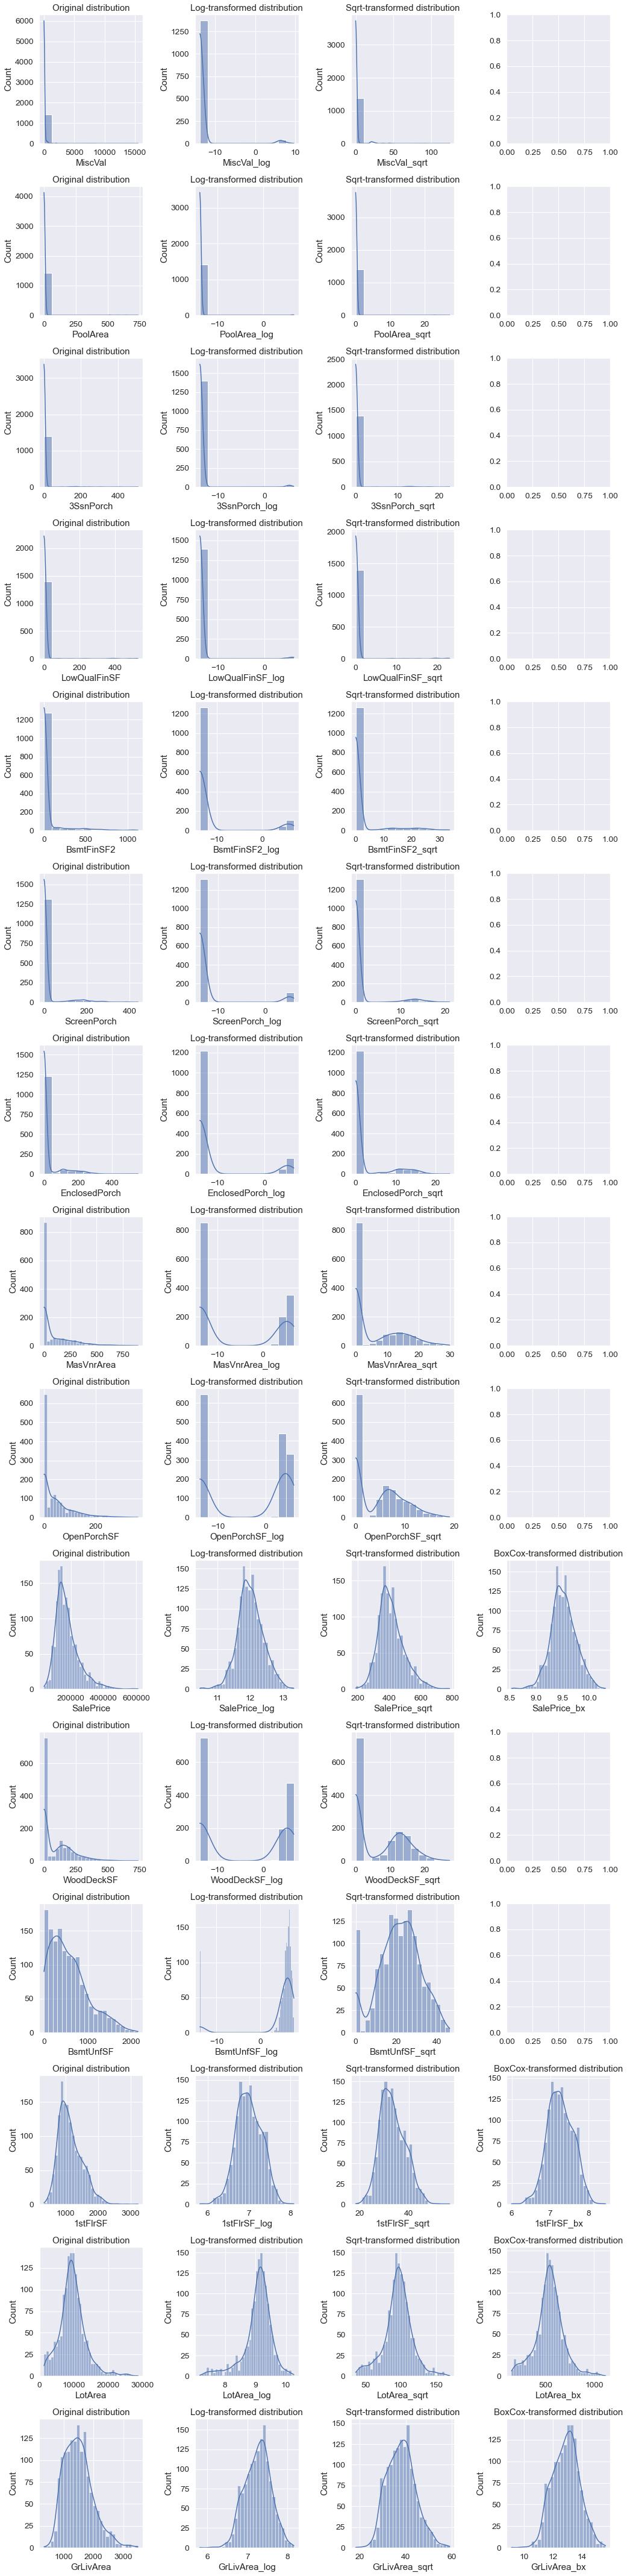

In [36]:
most_skewed = skewness.index[:15]
f,ax = plt.subplots(15,4,figsize=(15,60))
plt.tight_layout(pad=3)

for feature,index in zip(most_skewed,range(15)):
    ax[index,0].title.set_text('Original distribution')
    sns.histplot(data=df, x=feature, kde=True, ax=ax[index,0])
    
    ax[index,1].title.set_text('Log-transformed distribution')
    df[feature+'_log'] = df[feature].replace(0,1e-6)
    df[feature+'_log'] = np.log(df[feature+'_log'])
    sns.histplot(data=df, x=feature+'_log', kde=True, ax=ax[index,1])
    
    ax[index,2].title.set_text('Sqrt-transformed distribution')
    df[feature+'_sqrt'] = np.sqrt(df[feature])
    sns.histplot(data=df, x=feature+'_sqrt', kde=True, ax=ax[index,2])
    
    if df[feature].min() > 0:
        ax[index,3].title.set_text('BoxCox-transformed distribution')
        df[feature+'_bx'] = boxcox(df[feature])[0]
        sns.histplot(data=df, x=feature+'_bx', kde=True, ax=ax[index,3])

Most of the feature seem to not benifit much from any of the transformations, may be just LotArea (with BoxCox-transformed version),OpenPorchSF (sqrt), WoodDescSF (sqrt),BsmtUnfSF(sqrt),1stFlr(BoxCox) and GrLivArea (BoxCo)can be substitutedlater on after the baseline model is built-just to check if the model score impoves after the transformation.

In [37]:
df_train = prep_fill_nulls(original_df)
df_train = prep_cont_to_desc(df_train)
nlarges_nulls(df_train,n=5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSSubClass    1460 non-null   object
 1   OverallCond   1460 non-null   object
 2   YearRemodAdd  1460 non-null   object
 3   GarageYrBlt   1460 non-null   object
 4   MoSold        1460 non-null   object
 5   YrSold        1460 non-null   object
 6   GarageCars    1460 non-null   object
 7   Fireplaces    1460 non-null   object
 8   TotRmsAbvGrd  1460 non-null   object
 9   KitchenAbvGr  1460 non-null   object
 10  BedroomAbvGr  1460 non-null   object
 11  HalfBath      1460 non-null   object
 12  FullBath      1460 non-null   object
 13  BsmtHalfBath  1460 non-null   object
 14  BsmtFullBath  1460 non-null   object
 15  YearBuilt     1460 non-null   object
 16  OverallQual   1460 non-null   object
dtypes: object(17)
memory usage: 194.0+ KB


Percent of nulls
Id                        0.0
CentralAir                0.0
GarageYrBlt               0.0
GarageType                0.0
FireplaceQu               0.0

In [38]:
df_train = prep_fill_nulls(original_df)
df_train = prep_cont_to_desc(df_train)
nlarges_nulls(df_train,n=5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSSubClass    1460 non-null   object
 1   OverallCond   1460 non-null   object
 2   YearRemodAdd  1460 non-null   object
 3   GarageYrBlt   1460 non-null   object
 4   MoSold        1460 non-null   object
 5   YrSold        1460 non-null   object
 6   GarageCars    1460 non-null   object
 7   Fireplaces    1460 non-null   object
 8   TotRmsAbvGrd  1460 non-null   object
 9   KitchenAbvGr  1460 non-null   object
 10  BedroomAbvGr  1460 non-null   object
 11  HalfBath      1460 non-null   object
 12  FullBath      1460 non-null   object
 13  BsmtHalfBath  1460 non-null   object
 14  BsmtFullBath  1460 non-null   object
 15  YearBuilt     1460 non-null   object
 16  OverallQual   1460 non-null   object
dtypes: object(17)
memory usage: 194.0+ KB


Percent of nulls
Id                        0.0
CentralAir                0.0
GarageYrBlt               0.0
GarageType                0.0
FireplaceQu               0.0

In [39]:
df_test = prep_fill_nulls(df_test)
df_test = prep_cont_to_desc(df_test)
nlarges_nulls(df_test,n=5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSSubClass    1459 non-null   object
 1   OverallCond   1459 non-null   object
 2   YearRemodAdd  1459 non-null   object
 3   GarageYrBlt   1459 non-null   object
 4   MoSold        1459 non-null   object
 5   YrSold        1459 non-null   object
 6   GarageCars    1459 non-null   object
 7   Fireplaces    1459 non-null   object
 8   TotRmsAbvGrd  1459 non-null   object
 9   KitchenAbvGr  1459 non-null   object
 10  BedroomAbvGr  1459 non-null   object
 11  HalfBath      1459 non-null   object
 12  FullBath      1459 non-null   object
 13  BsmtHalfBath  1459 non-null   object
 14  BsmtFullBath  1459 non-null   object
 15  YearBuilt     1459 non-null   object
 16  OverallQual   1459 non-null   object
dtypes: object(17)
memory usage: 193.9+ KB


Percent of nulls
Id                        0.0
MSSubClass                0.0
GarageType                0.0
FireplaceQu               0.0
Fireplaces                0.0

Modelling phase

In [40]:
Y_train = df_train['SalePrice']
X_train = df_train.drop(columns=['SalePrice','Id'])
X_train

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0            60       RL         65.0     8450   Pave  None      Reg   
1            20       RL         80.0     9600   Pave  None      Reg   
2            60       RL         68.0    11250   Pave  None      IR1   
3            70       RL         60.0     9550   Pave  None      IR1   
4            60       RL         84.0    14260   Pave  None      IR1   
...         ...      ...          ...      ...    ...   ...      ...   
1455         60       RL         62.0     7917   Pave  None      Reg   
1456         20       RL         85.0    13175   Pave  None      Reg   
1457         70       RL         66.0     9042   Pave  None      Reg   
1458         20       RL         68.0     9717   Pave  None      Reg   
1459         20       RL         75.0     9937   Pave  None      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle OverallQual  ... GarageQual GarageCond  \
0          Norm     1Fam     2Story           7  ...         TA         TA   
1          Norm     1Fam     1Story           6  ...         TA         TA   
2          Norm     1Fam     2Story           7  ...         TA         TA   
3          Norm     1Fam     2Story           7  ...         TA         TA   
4          Norm     1Fam     2Story           8  ...         TA         TA   
...         ...      ...        ...         ...  ...        ...        ...   
1455       Norm     1Fam     2Story           6  ...         TA         TA   
1456       Norm     1Fam     1Story           6  ...         TA         TA   
1457       Norm     1Fam     2Story           7  ...         TA         TA   
1458       Norm     1Fam     1Story           5  ...         TA         TA   
1459       Norm     1Fam     1Story           5  ...         TA         TA   

     PavedDrive WoodDeckSF OpenPorchSF EnclosedPorch 3SsnPorch ScreenPorch  \
0             Y          0          61             0         0           0   
1             Y        298           0             0         0           0   
2             Y          0          42             0         0           0   
3             Y          0          35           272         0           0   
4             Y        192          84             0         0           0   
...         ...        ...         ...           ...       ...         ...   
1455          Y          0          40             0         0           0   
1456          Y        349           0             0         0           0   
1457          Y          0          60             0         0           0   
1458          Y        366           0           112         0           0   
1459          Y        736          68             0         0           0   

      PoolArea PoolQC  Fence MiscFeature MiscVal MoSold YrSold SaleType  \
0            0   None   None        None       0      2   2008       WD   
1            0   None   None        None       0      5   2007       WD   
2            0   None   None        None       0      9   2008       WD   
3            0   None   None        None       0      2   2006       WD   
4 

Lets transform string values to numerical and scale the dateset.

In [41]:
from sklearn.preprocessing import RobustScaler,LabelEncoder
LABEL_ENCODERS = {}

def factorize_df(df):
    cat_features = df.select_dtypes(object)
    for cat_feature in cat_features:
        if cat_feature not in LABEL_ENCODERS.keys():
            LABEL_ENCODERS[cat_feature] = LabelEncoder()
            LABEL_ENCODERS[cat_feature].fit(df[cat_feature])
        df[cat_feature] = LABEL_ENCODERS[cat_feature].transform(df[cat_feature])
    return df


X_train = factorize_df(X_train)
X_train

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0              9         3         65.0     8450       1      1         3   
1              4         3         80.0     9600       1      1         3   
2              9         3         68.0    11250       1      1         0   
3             10         3         60.0     9550       1      1         0   
4              9         3         84.0    14260       1      1         0   
...          ...       ...          ...      ...     ...    ...       ...   
1455           9         3         62.0     7917       1      1         3   
1456           4         3         85.0    13175       1      1         3   
1457          10         3         66.0     9042       1      1         3   
1458           4         3         68.0     9717       1      1         3   
1459           4         3         75.0     9937       1      1         3   

      LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0               3          0          4          0             5           2   
1               3          0          2          0            24           1   
2               3          0          4          0             5           2   
3               3          0          0          0             6           2   
4               3          0          2          0            15           2   
...           ...        ...        ...        ...           ...         ...   
1455            3          0          4          0             8           2   
1456            3          0          4          0            14           2   
1457            3          0          4          0             6           2   
1458            3          0          4          0            12           2   
1459            3          0          4          0             7           2   

      Condition2  BldgType  HouseStyle  OverallQual  ...  GarageQual  \
0              2         0           5            7  ...           5   
1              2         0           2            6  ...           5   
2              2         0           5            7  ...           5   
3              2         0           5            7  ...           5   
4              2         0           5            8  ...           5   
...          ...       ...         ...          ...  ...         ...   
1455           2         0           5            6  ...           5   
1456           2         0           2            6  ...           5   
1457           2         0           5            7  ...           5   
1458           2         0           2            5  ...           5   
1459           2         0           2            5  ...           5   

      GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0              5           2           0           61              0   
1              5           2         298            0              0   
2              5           2           0           42              0   
3              5           2           0           35            272   
4              5           2         192           84              0   
...          ...         ...         ...          ...            ...   
1455           5           2           0           40              0   
1456           5           2         349            0              0   
1457           5           2           0           60              0   
1458           5           2         366            0            112   
1459           5           2         736           68              0   

      3SsnPorch  ScreenPorch  PoolArea  PoolQC  Fence  MiscFeature  MiscVal  \
0             0            0         0       3      4            1        0   
1             0            0         0       3      4            1        0   
2             0            0         0       3      4            1        0   
3             0            0         0       3      4            1        

In [42]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)

Now we have a suitable for ML models data. Lets build a linear regression model employing Kfold technique to see how well it perfprms.

<IPython.core.display.Javascript object>

4 fold validation accuracy scores: 
 [nan nan nan nan nan]
Mean accuracy is: nan
Mean score is: 0.7689028608086526


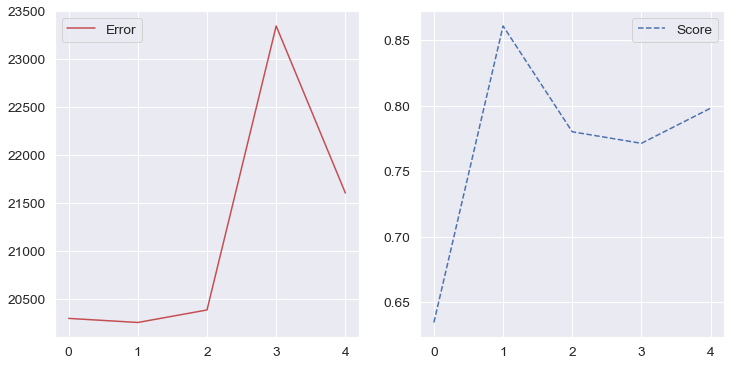

In [43]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

kfold=KFold(n_splits=5, shuffle=True)
fold_scores = []
fold_error = []


for train_index, test_index in kfold.split(X_train):
    Xtr,Xval = X_train[train_index],X_train[test_index]
    ytr,yval = Y_train[train_index],Y_train[test_index]
    
    model = LinearRegression().fit(Xtr,ytr)
    fold_scores.append(model.score(Xval,yval))
    fold_error.append(mean_absolute_error(yval,model.predict(Xval)))
    
kfold_accuracy = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')

print('4 fold validation accuracy scores: \n', (kfold_accuracy))
    
print("Mean accuracy is: {}\nMean score is: {}".format(np.mean(kfold_accuracy),np.mean(fold_scores)))

f,ax = plt.subplots(1,2,figsize=(12,6))

ax[0].plot(range(len(fold_error)),
         fold_error,'r-',
         label='Error')
ax[1].plot(range(len(fold_scores)),
         fold_scores,'b--',
         label='Score')
ax[0].legend()
ax[1].legend()
plt.show()